In [1]:
import config
import requests
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
state_codes = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
               'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
               'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
               'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
               'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
               'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
               'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
               'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
               'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
               'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
               'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
               'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
               'Wisconsin': 'WI', 'Wyoming': 'WY'}

In [3]:
cs_response = requests.get(f"https://api.census.gov/data/2018/abscs?get=NAME,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,YIBSZFI,YIBSZFI_LABEL,RCPSZFI,RCPSZFI_LABEL,FIRMPDEMP,EMP,PAYANN&for=state:*&NAICS2017=00&key={config.api_key}")

In [4]:
cbo_response = requests.get(f"https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_ETH,OWNER_RACE,OWNER_VET,OWNPDEMP&for=state:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02&key={config.api_key}")

In [5]:
cs_list = cs_response.json()
cs = pd.DataFrame(cs_list[1:], columns = cs_list[0])
cs[['FIRMPDEMP', 'EMP', 'PAYANN']] = cs[['FIRMPDEMP', 'EMP', 'PAYANN']].apply(pd.to_numeric)
cs['state_code'] = cs['NAME'].map(state_codes)

In [6]:
cbo_list = cbo_response.json()
cbo = pd.DataFrame(cbo_list[1:], columns = cbo_list[0])
cbo['OWNPDEMP'] = pd.to_numeric(cbo['OWNPDEMP'])

In [7]:
cs_servtotal = cs[(cs['SEX'] == '001') & (cs['ETH_GROUP'] == '001')
              & (cs['RACE_GROUP'] == '00') & (cs['VET_GROUP'] == '001')]
cs_servtotal.drop(['SEX', 'SEX_LABEL', 'ETH_GROUP', 'ETH_GROUP_LABEL',
                   'RACE_GROUP', 'RACE_GROUP_LABEL', 'VET_GROUP', 'VET_GROUP_LABEL'],
                  axis = 1, inplace = True)
cs_servtotal

C:\Users\agang_drcif5q\miniconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,NAME,YIBSZFI,YIBSZFI_LABEL,RCPSZFI,RCPSZFI_LABEL,FIRMPDEMP,EMP,PAYANN,NAICS2017,state,state_code
35,Mississippi,318,Firms with 2 to 3 years in business,001,All firms,4432,32809,825902,00,28,MS
36,Mississippi,319,Firms with 4 to 5 years in business,001,All firms,3201,21806,545078,00,28,MS
37,Mississippi,321,Firms with 6 to 10 years in business,001,All firms,6455,57027,1768985,00,28,MS
38,Mississippi,322,Firms with 11 to 15 years in business,001,All firms,5790,67830,2034845,00,28,MS
39,Mississippi,323,Firms with 16 or more years in business,001,All firms,16079,716886,28306886,00,28,MS
...,...,...,...,...,...,...,...,...,...,...,...
72296,Minnesota,318,Firms with 2 to 3 years in business,001,All firms,11712,69732,2236187,00,27,MN
72297,Minnesota,319,Firms with 4 to 5 years in business,001,All firms,9541,81985,2964101,00,27,MN
72298,Minnesota,321,Firms with 6 to 10 years in business,001,All firms,18305,185432,6713740,00,27,MN
72299,Minnesota,322,Firms with 11 to 15 years in business,001,All firms,16034,149035,5509298,00,27,MN


In [23]:
cs_hib = cs_servtotal[(cs_servtotal['YIBSZFI'] == '001') & (cs_servtotal['RCPSZFI'] == '532')]
cs_hib.drop(['YIBSZFI', 'YIBSZFI_LABEL', 'RCPSZFI_LABEL', 'EMP', 'PAYANN', 'NAICS2017'], axis = 1, inplace = True)
cs_hib

C:\Users\agang_drcif5q\miniconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,RCPSZFI,FIRMPDEMP,state,state_code
1257,Mississippi,532,14398,28,MS
2289,Missouri,532,31953,29,MO
3083,Montana,532,7305,30,MT
4136,Nebraska,532,12288,31,NE
6676,Nevada,532,17125,32,NV
7817,New Hampshire,532,10537,33,NH
9121,New Jersey,532,58912,34,NJ
9711,New Mexico,532,9520,35,NM
11863,New York,532,125080,36,NY
13123,North Carolina,532,49825,37,NC


In [25]:
fig = go.Figure(data = go.Choropleth(locations = cs_hib['state_code'], locationmode = 'USA-states',
                                     z = cs_hib['FIRMPDEMP'],
                                     colorscale = 'blues',
                                     colorbar_title = 'Number of Businesses'),
               layout = go.Layout(geo = dict(bgcolor = 'rgba(0,0,0,0)'),
                                  paper_bgcolor = 'rgba(255,255,255,0.9)'))
fig.update_layout(title_text = 'Number of High Revenue Businesses by State',
                  title_x = 0.5,
                  geo_scope = 'usa')

fig.show()

In [18]:
cs_ae = cs_servtotal[cs_servtotal['RCPSZFI'] == '001'].groupby(['YIBSZFI']).sum()
cs_ae.drop('PAYANN', axis = 1, inplace = True)
cs_ae

,FIRMPDEMP,EMP
YIBSZFI,,
001,5917384,128196406
311,824007,3542062
318,698324,4939419
319,523253,4391911
321,915409,9208077
322,816297,9038554
323,2046594,96251717


In [20]:
cs_ae['EMP / FIRMPDEMP'] = cs_ae['EMP'] / cs_ae['FIRMPDEMP']
cs_ae

,FIRMPDEMP,EMP,EMP / FIRMPDEMP
YIBSZFI,,,
001,5917384,128196406,21.664372
311,824007,3542062,4.298582
318,698324,4939419,7.073248
319,523253,4391911,8.393475
321,915409,9208077,10.058976
322,816297,9038554,11.072629
323,2046594,96251717,47.030196


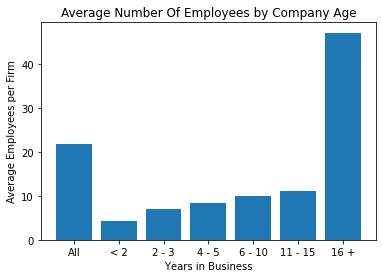

In [16]:
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)

plt.bar(cs_ae.index, cs_ae['EMP / FIRMPDEMP'])
plt.xlabel('Y\u200Aears in Business')
plt.ylabel('Average Employees per Firm')
plt.title('Average Number Of Employees by Company Age')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['All', '< 2', '2 - 3', '4 - 5', '6 - 10', '11 - 15', '16 +'])

plt.show()

In [12]:
cs_total = cs_servtotal[(cs_servtotal['RCPSZFI'] == '001') & (cs_servtotal['YIBSZFI'] == '001')]
cs_total.drop(['YIBSZFI', 'YIBSZFI_LABEL', 'RCPSZFI', 'RCPSZFI_LABEL'], axis = 1, inplace = True)
cs_total

C:\Users\agang_drcif5q\miniconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,FIRMPDEMP,EMP,PAYANN,NAICS2017,state,state_code
1248,Mississippi,40856,920447,34137231,00,28,MS
2196,Missouri,106753,2464500,116172182,00,29,MO
3050,Montana,31661,361600,14060286,00,30,MT
4127,Nebraska,43189,855009,38441262,00,31,NE
6667,Nevada,51758,1240230,55634075,00,32,NV
7742,New Hampshire,28969,584769,30156054,00,33,NH
9021,New Jersey,187243,3736734,229676168,00,34,NJ
9680,New Mexico,32197,584145,24658546,00,35,NM
11854,New York,446155,8073389,546738617,00,36,NY
13052,North Carolina,167837,3679286,176807199,00,37,NC


In [26]:
cs_total = cs_total[['NAME', 'FIRMPDEMP', 'state_code']]
cbo_total = cbo[['NAME', 'OWNPDEMP']]
cs_cbo = cs_total.merge(cbo_total, how = 'inner', on = 'NAME')
cs_cbo

,NAME,FIRMPDEMP,state_code,OWNPDEMP
0,Mississippi,40856,MS,1158
1,Missouri,106753,MO,3564
2,Montana,31661,MT,748
3,Nebraska,43189,NE,1612
4,Nevada,51758,NV,572
5,New Hampshire,28969,NH,661
6,New Jersey,187243,NJ,5324
7,New Mexico,32197,NM,788
8,New York,446155,NY,8918
9,North Carolina,167837,NC,4256


In [27]:
cs_cbo['FIRM / OWNER'] = cs_cbo['FIRMPDEMP'] / cs_cbo['OWNPDEMP']
cs_cbo

,NAME,FIRMPDEMP,state_code,OWNPDEMP,FIRM / OWNER
0,Mississippi,40856,MS,1158,35.281520
1,Missouri,106753,MO,3564,29.953143
2,Montana,31661,MT,748,42.327540
3,Nebraska,43189,NE,1612,26.792184
4,Nevada,51758,NV,572,90.486014
5,New Hampshire,28969,NH,661,43.826021
6,New Jersey,187243,NJ,5324,35.169609
7,New Mexico,32197,NM,788,40.859137
8,New York,446155,NY,8918,50.028594
9,North Carolina,167837,NC,4256,39.435385


In [30]:
cs_cbo.nlargest(5, 'FIRM / OWNER')

,NAME,FIRMPDEMP,state_code,OWNPDEMP,FIRM / OWNER
4,Nevada,51758,NV,572,90.486014
15,Rhode Island,22900,RI,312,73.397436
29,Arizona,107152,AZ,1509,71.008615
33,Delaware,19663,DE,289,68.038062
36,Florida,447363,FL,6716,66.611525


In [29]:
fig = go.Figure(data = go.Choropleth(locations = cs_cbo['state_code'], locationmode = 'USA-states',
                                     z = cs_cbo['FIRM / OWNER'],
                                     colorscale = 'blues',
                                     colorbar_title = 'Businesses per Owner'),
               layout = go.Layout(geo = dict(bgcolor = 'rgba(0,0,0,0)'),
                                  paper_bgcolor = 'rgba(255,255,255,0.9)'))
fig.update_layout(title_text = 'Number of Businesses vs Number of Business Owners by State',
                  title_x = 0.5,
                  geo_scope = 'usa')

fig.show()